Using Action in GANS Book : and repo: 
https://github.com/GANs-in-Action/gans-in-action/blob/master/chapter-3/Chapter_3_GAN.ipynb

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam # - Works


In [ ]:
img_rows = 28
img_cols = 28
channels = 1

# Input image dimensions
img_shape = (img_rows, img_cols, channels)

# Size of the noise vector, used as input to the Generator
z_dim = 100

In [ ]:
def build_generator(img_shape, z_dim):

    model = Sequential()

    # Fully connected layer
    model.add(Dense(128, input_dim=z_dim))

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with tanh activation
    model.add(Dense(28 * 28 * 1, activation='tanh'))

    # Reshape the Generator output to image dimensions
    model.add(Reshape(img_shape))

    return model

In [ ]:
def build_discriminator(img_shape):

    model = Sequential()

    # Flatten the input image
    model.add(Flatten(input_shape=img_shape))

    # Fully connected layer
    model.add(Dense(128))

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with sigmoid activation
    model.add(Dense(1, activation='sigmoid'))

    return model

Build Model

In [ ]:
def build_gan(generator, discriminator):

    model = Sequential()

    # Combined Generator -> Discriminator model
    model.add(generator)
    model.add(discriminator)

    return model

In [ ]:
# Build and compile the Discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(),
                      metrics=['accuracy'])

# Build the Generator
generator = build_generator(img_shape, z_dim)

# Keep Discriminator’s parameters constant for Generator training
discriminator.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

Training

In [ ]:
losses = []
accuracies = []
iteration_checkpoints = []


def train(iterations, batch_size, sample_interval):

    # Load the MNIST dataset
    (X_train, _), (_, _) = mnist.load_data()

    # Rescale [0, 255] grayscale pixel values to [-1, 1]
    X_train = X_train / 127.5 - 1.0
    X_train = np.expand_dims(X_train, axis=3)

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)
        
        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Generator
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            sample_images(generator)

In [ ]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):

    # Sample random noise
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise
    gen_imgs = generator.predict(z)

    # Rescale image pixel values to [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5

    # Set image grid
    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output a grid of images
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1

Train the GAN and Inspect Output









1000 [D loss: 0.017805, acc.: 100.00%] [G loss: 4.413495]
2000 [D loss: 0.094312, acc.: 96.88%] [G loss: 4.125560]
3000 [D loss: 0.113768, acc.: 96.09%] [G loss: 6.320148]
4000 [D loss: 0.290015, acc.: 91.41%] [G loss: 4.447917]
5000 [D loss: 0.295876, acc.: 84.77%] [G loss: 3.520932]
6000 [D loss: 0.267354, acc.: 88.28%] [G loss: 4.252020]
7000 [D loss: 0.430082, acc.: 80.86%] [G loss: 3.314867]
8000 [D loss: 0.241579, acc.: 88.28%] [G loss: 3.280760]
9000 [D loss: 0.487217, acc.: 80.86%] [G loss: 2.900104]
10000 [D loss: 0.361007, acc.: 85.55%] [G loss: 3.870785]
11000 [D loss: 0.384460, acc.: 81.64%] [G loss: 3.085317]
12000 [D loss: 0.342206, acc.: 84.77%] [G loss: 2.859092]
13000 [D loss: 0.272419, acc.: 89.45%] [G loss: 3.320290]
14000 [D loss: 0.356138, acc.: 82.42%] [G loss: 2.606480]
15000 [D loss: 0.328370, acc.: 87.50%] [G loss: 3.306128]
16000 [D loss: 0.402144, acc.: 82.81%] [G loss: 2.435988]
17000 [D loss: 0.412116, acc.: 83.59%] [G loss: 2.396814]
18000 [D loss: 0.35194

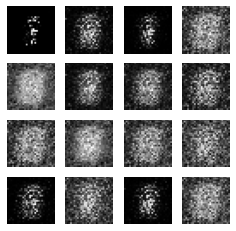

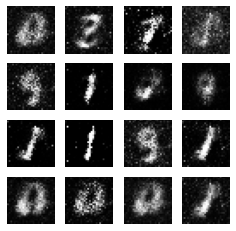

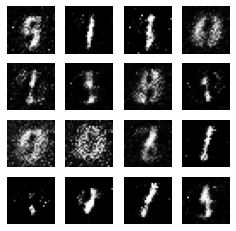

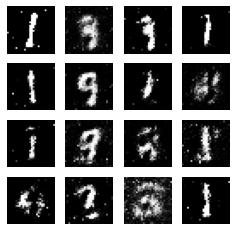

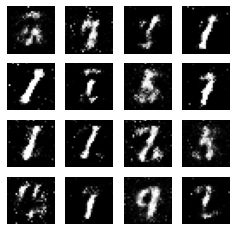

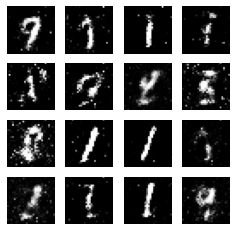

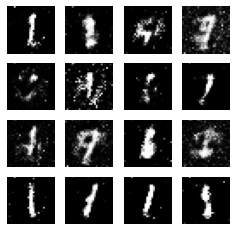

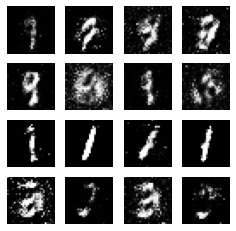

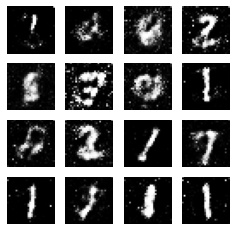

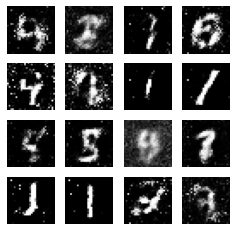

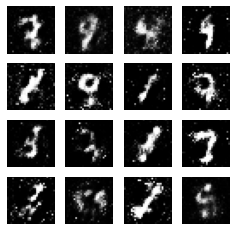

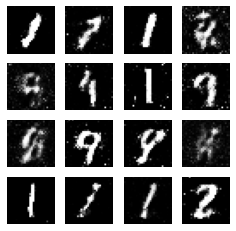

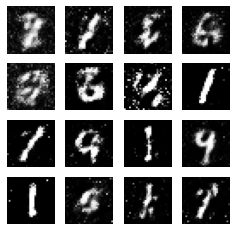

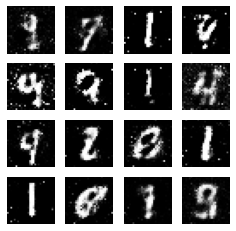

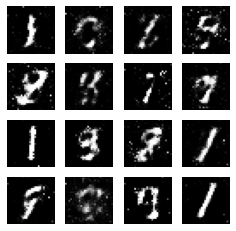

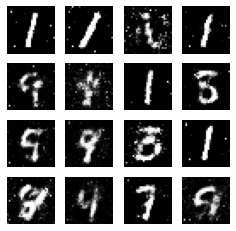

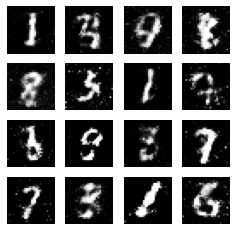

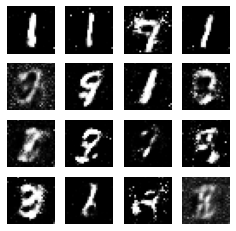

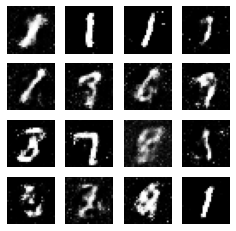

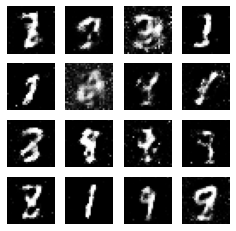

In [ ]:
# Set hyperparameters
iterations = 20000
batch_size = 128
sample_interval = 1000

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

In [ ]:
# save the generator model tile file
filename = 'generator_model_%03d.h5' 
gan.save(filename)

In [ ]:
generator.save('trained_generator.h5')

In [ ]:
# save the generator model tile file
filename = 'discriminator_model_%03d.h5' 
discriminator.save(filename)

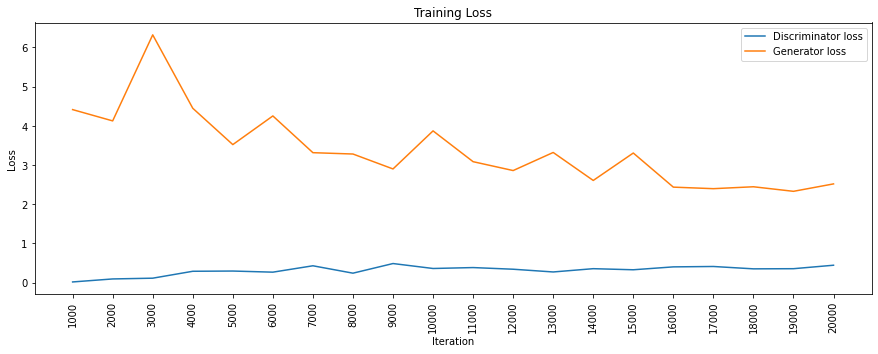

In [ ]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

In [ ]:
gan.get_weights()


[array([[ 0.00334719, -0.09383059, -0.14182949, ..., -0.00201761,
          0.08602659, -0.08552977],
        [-0.00968059, -0.03310543, -0.08730479, ...,  0.09158528,
         -0.09639311, -0.1712831 ],
        [-0.00364245,  0.0148752 ,  0.26176497, ...,  0.08218887,
         -0.01241078,  0.03064987],
        ...,
        [ 0.00653193,  0.06415071, -0.12490068, ..., -0.20101239,
         -0.12411263, -0.01991436],
        [-0.02597141, -0.11984994,  0.13326849, ...,  0.04812171,
          0.09702595,  0.12570162],
        [ 0.010689  , -0.08763301,  0.17498618, ..., -0.0013958 ,
          0.04525673,  0.07163363]], dtype=float32),
 array([-0.5685266 , -1.417739  , -1.2957127 , -1.6962082 , -0.51714855,
        -1.5718201 , -1.3258675 , -1.0405267 , -1.2402644 , -1.3672634 ,
        -1.3288754 , -1.4900533 , -1.134442  , -1.4771179 , -1.6166574 ,
        -0.9802868 , -1.6893454 , -1.3792043 , -0.88527435, -1.3730142 ,
        -1.5238311 , -1.3842316 , -0.6801525 , -0.6338268 , -0.967

In [ ]:
gan.save_weights('weights.h5', overwrite=True, save_format=None, options=None)

# Convert GANS Model to ONNx

In [1]:
#install dependeics 
!sudo apt-get install g++ freeglut3-dev build-essential libx11-dev libxmu-dev libxi-dev libglu1-mesa libglu1-mesa-dev
!sudo apt-get install libfreeimage3 libfreeimage-dev
!pip3 install pycuda onnx scikit-image
!pip3 install matplotlib keras2onnx tf2onnx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
libglu1-mesa is already the newest version (9.0.0-2.1build1).
libglu1-mesa set to manually installed.
libglu1-mesa-dev is already the newest version (9.0.0-2.1build1).
libglu1-mesa-dev set to manually installed.
libxi-dev is already the newest version (2:1.7.9-1).
libxi-dev set to manually installed.
libxmu-dev is already the newest version (2:1.1.2-2).
libxmu-dev set to manually installed.
freeglut3-dev is already the newest version (2.8.1-3).
freeglut3-dev set to manually installed.
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.4).
libx11-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp -R /content/gdrive/MyDrive/TensorRT/* /content 

In [4]:
!sudo dpkg -i /content/cudnn-local-repo-ubuntu1804-8.3.2.44_1.0-1_amd64.deb
!sudo apt-key add /var/cudnn-local-repo-*/7fa2af80.pub
!sudo apt-get update
!sudo apt-get --allow-change-held-packages install libcudnn8=8.3.2.44-1+cuda11.5
!sudo apt-get --allow-change-held-packages install libcudnn8-dev=8.3.2.44-1+cuda11.5
!sudo apt-get --allow-change-held-packages install libcudnn8-samples=8.3.2.44-1+cuda11.5

Selecting previously unselected package cudnn-local-repo-ubuntu1804-8.3.2.44.
(Reading database ... 155141 files and directories currently installed.)
Preparing to unpack .../cudnn-local-repo-ubuntu1804-8.3.2.44_1.0-1_amd64.deb ...
Unpacking cudnn-local-repo-ubuntu1804-8.3.2.44 (1.0-1) ...
Setting up cudnn-local-repo-ubuntu1804-8.3.2.44 (1.0-1) ...
OK
Get:1 file:/var/cudnn-local-repo-ubuntu1804-8.3.2.44  InRelease
Ign:1 file:/var/cudnn-local-repo-ubuntu1804-8.3.2.44  InRelease
Get:2 file:/var/cudnn-local-repo-ubuntu1804-8.3.2.44  Release [564 B]
Get:2 file:/var/cudnn-local-repo-ubuntu1804-8.3.2.44  Release [564 B]
Get:3 file:/var/cudnn-local-repo-ubuntu1804-8.3.2.44  Release.gpg [836 B]
Get:3 file:/var/cudnn-local-repo-ubuntu1804-8.3.2.44  Release.gpg [836 B]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 file:/var/cudnn-local-repo-ubuntu1804-8.3.2.44  Packages [952 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 

In [5]:
#check
!cp -r /usr/src/cudnn_samples_v8/ /content
%cd  /content/cudnn_samples_v8/mnistCUDNN
!make clean && make
!./mnistCUDNN

/content/cudnn_samples_v8/mnistCUDNN
rm -rf *o
rm -rf mnistCUDNN
CUDA_VERSION is 11010
Linking agains cublasLt = true
CUDA VERSION: 11010
TARGET ARCH: x86_64
HOST_ARCH: x86_64
TARGET OS: linux
SMS: 35 50 53 60 61 62 70 72 75 80 86
/usr/local/cuda/bin/nvcc -I/usr/local/cuda/include -I/usr/local/cuda/targets/ppc64le-linux/include -IFreeImage/include  -ccbin g++ -m64    -gencode arch=compute_35,code=sm_35 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_53,code=sm_53 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_61,code=sm_61 -gencode arch=compute_62,code=sm_62 -gencode arch=compute_70,code=sm_70 -gencode arch=compute_72,code=sm_72 -gencode arch=compute_75,code=sm_75 -gencode arch=compute_80,code=sm_80 -gencode arch=compute_86,code=sm_86 -gencode arch=compute_86,code=compute_86 -o fp16_dev.o -c fp16_dev.cu
nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use 

In [6]:
#install tensorrt
!sudo dpkg -i /content/nv-tensorrt-repo-ubuntu1804-cuda11.4-trt8.2.3.0-ga-20220113_1-1_amd64.deb
!sudo apt-key add /var/nv-tensorrt-repo-ubuntu1804-cuda11.4-trt8.2.3.0-ga-20220113/7fa2af80.pub
!sudo apt-get update
!sudo apt-get install tensorrt

Selecting previously unselected package nv-tensorrt-repo-ubuntu1804-cuda11.4-trt8.2.3.0-ga-20220113.
(Reading database ... 155230 files and directories currently installed.)
Preparing to unpack .../nv-tensorrt-repo-ubuntu1804-cuda11.4-trt8.2.3.0-ga-20220113_1-1_amd64.deb ...
Unpacking nv-tensorrt-repo-ubuntu1804-cuda11.4-trt8.2.3.0-ga-20220113 (1-1) ...
Setting up nv-tensorrt-repo-ubuntu1804-cuda11.4-trt8.2.3.0-ga-20220113 (1-1) ...
OK
Get:1 file:/var/cudnn-local-repo-ubuntu1804-8.3.2.44  InRelease
Ign:1 file:/var/cudnn-local-repo-ubuntu1804-8.3.2.44  InRelease
Get:2 file:/var/nv-tensorrt-repo-ubuntu1804-cuda11.4-trt8.2.3.0-ga-20220113  InRelease
Ign:2 file:/var/nv-tensorrt-repo-ubuntu1804-cuda11.4-trt8.2.3.0-ga-20220113  InRelease
Get:3 file:/var/cudnn-local-repo-ubuntu1804-8.3.2.44  Release [564 B]
Get:4 file:/var/nv-tensorrt-repo-ubuntu1804-cuda11.4-trt8.2.3.0-ga-20220113  Release [569 B]
Get:3 file:/var/cudnn-local-repo-ubuntu1804-8.3.2.44  Release [564 B]
Get:4 file:/var/nv-tensor

In [7]:
!python3 -m pip install numpy
!sudo apt-get install python3-libnvinfer-dev
!python3 -m pip install protobuf
!sudo apt-get install uff-converter-tf
!python3 -m pip install numpy onnx
!sudo apt-get install onnx-graphsurgeon

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [8]:
!dpkg -l | grep TensorRT

ii  graphsurgeon-tf                                             8.2.3-1+cuda11.4                    amd64        GraphSurgeon for TensorRT package
ii  libnvinfer-bin                                              8.2.3-1+cuda11.4                    amd64        TensorRT binaries
ii  libnvinfer-dev                                              8.2.3-1+cuda11.4                    amd64        TensorRT development libraries and headers
ii  libnvinfer-doc                                              8.2.3-1+cuda11.4                    all          TensorRT documentation
ii  libnvinfer-plugin-dev                                       8.2.3-1+cuda11.4                    amd64        TensorRT plugin libraries
ii  libnvinfer-plugin8                                          8.2.3-1+cuda11.4                    amd64        TensorRT plugin libraries
ii  libnvinfer-samples                                          8.2.3-1+cuda11.4                    all          TensorRT samples
ii  libnvinfer8       

In [9]:
%cd /usr/src/tensorrt/samples/trtexec
!make

/usr/src/tensorrt/samples/trtexec
../Makefile.config:12: CUDA_INSTALL_DIR variable is not specified, using /usr/local/cuda by default, use CUDA_INSTALL_DIR=<cuda_directory> to change.
../Makefile.config:17: CUDNN_INSTALL_DIR variable is not specified, using /usr/local/cuda by default, use CUDNN_INSTALL_DIR=<cudnn_directory> to change.
../Makefile.config:30: TRT_LIB_DIR is not specified, searching ../../lib, ../../lib, ../lib by default, use TRT_LIB_DIR=<trt_lib_directory> to change.
../Makefile.config:35: PROTOBUF_INSTALL_DIR variable is not specified, use PROTOBUF_INSTALL_DIR=<protobuf_directory> to change. Using default value: /usr/lib/x86_64-linux-gnu
if [ ! -d ../../bin/chobj/trtexec/trtexec/../common ]; then mkdir -p ../../bin/dchobj/trtexec/trtexec/../common; fi && :
Compiling: trtexec.cpp
if [ ! -d ../../bin/chobj/trtexec/trtexec/../common ]; then mkdir -p ../../bin/dchobj/trtexec/trtexec/../common; fi && :
Compiling: ../common/sampleInference.cpp
if [ ! -d ../../bin/chobj/trtex

In [10]:
!/usr/src/tensorrt/bin/trtexec

&&&& RUNNING TensorRT.trtexec [TensorRT v8203] # /usr/src/tensorrt/bin/trtexec
=== Model Options ===
  --uff=<file>                UFF model
  --onnx=<file>               ONNX model
  --model=<file>              Caffe model (default = no model, random weights used)
  --deploy=<file>             Caffe prototxt file
  --output=<name>[,<name>]*   Output names (it can be specified multiple times); at least one output is required for UFF and Caffe
  --uffInput=<name>,X,Y,Z     Input blob name and its dimensions (X,Y,Z=C,H,W), it can be specified multiple times; at least one is required for UFF models
  --uffNHWC                   Set if inputs are in the NHWC layout instead of NCHW (use X,Y,Z=H,W,C order in --uffInput)

=== Build Options ===
  --maxBatch                  Set max batch size and build an implicit batch engine (default = same size as --batch)
                              This option should not be used when the input model is ONNX or when dynamic shapes are provided.
  --minSh

In [11]:
!pip3 install /content/tensorrt-python/*

Processing /content/tensorrt-python/nvidia-cublas-cu11-2021.12.3.tar.gz
Processing /content/tensorrt-python/nvidia_cublas_cu116-11.8.1.74-py3-none-manylinux1_x86_64.whl
Processing /content/tensorrt-python/nvidia-cuda-runtime-cu11-2021.12.20.tar.gz
Processing /content/tensorrt-python/nvidia_cuda_runtime_cu116-11.6.55-py3-none-manylinux1_x86_64.whl
Processing /content/tensorrt-python/nvidia-cudnn-cu11-2022.1.13.tar.gz
Processing /content/tensorrt-python/nvidia_cudnn_cu115-8.3.2.44-py3-none-manylinux1_x86_64.whl
Processing /content/tensorrt-python/nvidia_tensorrt-8.2.1.8-cp37-none-linux_x86_64.whl
  Created wheel for nvidia-cublas-cu11: filename=nvidia_cublas_cu11-2021.12.3-py3-none-any.whl size=15634 sha256=71ec162adf792cccce9850a62a0f88a567c8288d21f3b1290744fe3db4caa4b5
  Stored in directory: /root/.cache/pip/wheels/60/e2/f6/76765b38b652e511bba0f28c955fb4eece78b6721b228ba972
  Created wheel for nvidia-cuda-runtime-cu11: filename=nvidia_cuda_runtime_cu11-2021.12.20-py3-none-any.whl size=

In [12]:
import onnx 

* Load Model

In [ ]:
from keras.models import load_model
model = load_model('gan.h5')


* Convert to ONNX

In [ ]:
model.save('my_model')
!python -m tf2onnx.convert --saved-model my_model --output temp.onnx
onnx_model = onnx.load_model('temp.onnx')


INFO:tensorflow:Assets written to: my_model/assets
/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-02-12 20:45:15,084 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-02-12 20:45:15,548 - INFO - Signatures found in model: [serving_default].
2022-02-12 20:45:15,549 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-02-12 20:45:15,549 - INFO - Output names: ['sequential']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-02-12 20:45:15,671 - WARNING - From /usr/local/lib/python3.7/dist-packages/tf2onnx/tf_loader.py:706: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract

* Save Model

In [ ]:
model_name = "simple_gan.onnx"
onnx.save_model(onnx_model, model_name)
print("Done saving!")

Done saving!


In [ ]:
import numpy as np

USE_FP16 = True

target_dtype = np.float16 if USE_FP16 else np.float32

In [ ]:
# May need to shut down all kernels and restart before this - otherwise you might get cuDNN initialization errors:
if USE_FP16:
    !/usr/src/tensorrt/bin/trtexec --onnx=simple_gan.onnx --saveEngine=resnet_engine.trt  --explicitBatch --inputIOFormats=fp16:chw --outputIOFormats=fp16:chw --fp16
else:
    !/usr/src/tensorrt/bin/trtexec --onnx=simple_gan.onnx --saveEngine=resnet_engine.trt  --explicitBatch


&&&& RUNNING TensorRT.trtexec [TensorRT v8203] # /usr/src/tensorrt/bin/trtexec --onnx=simple_gan.onnx --saveEngine=resnet_engine.trt --explicitBatch --inputIOFormats=fp16:chw --outputIOFormats=fp16:chw --fp16
[02/12/2022-20:45:28] [W] --explicitBatch flag has been deprecated and has no effect!
[02/12/2022-20:45:28] [W] Explicit batch dim is automatically enabled if input model is ONNX or if dynamic shapes are provided when the engine is built.
[02/12/2022-20:45:28] [I] === Model Options ===
[02/12/2022-20:45:28] [I] Format: ONNX
[02/12/2022-20:45:28] [I] Model: simple_gan.onnx
[02/12/2022-20:45:28] [I] Output:
[02/12/2022-20:45:28] [I] === Build Options ===
[02/12/2022-20:45:28] [I] Max batch: explicit batch
[02/12/2022-20:45:28] [I] Workspace: 16 MiB
[02/12/2022-20:45:28] [I] minTiming: 1
[02/12/2022-20:45:28] [I] avgTiming: 8
[02/12/2022-20:45:28] [I] Precision: FP32+FP16
[02/12/2022-20:45:28] [I] Calibration: 
[02/12/2022-20:45:28] [I] Refit: Disabled
[02/12/2022-20:45:28] [I] Spars

In [ ]:
!ls -la


total 2514500
drwxr-xr-x 1 root root       4096 Feb 12 20:45 .
drwxr-xr-x 1 root root       4096 Feb 12 20:25 ..
drwxr-xr-x 4 root root       4096 Feb  1 14:31 .config
-r-------- 1 root root  873913482 Feb 12 20:31 cudnn-local-repo-ubuntu1804-8.3.2.44_1.0-1_amd64.deb
drwxr-xr-x 7 root root       4096 Feb 12 20:35 cudnn_samples_v8
-rw-r--r-- 1 root root    1804488 Feb 12 20:38 gan.h5
drwx------ 5 root root       4096 Feb 12 20:31 gdrive
drwxr-xr-x 2 root root       4096 Feb 12 20:40 .ipynb_checkpoints
dr-x------ 5 root root       4096 Feb 12 20:31 models
drwxr-xr-x 4 root root       4096 Feb 12 20:45 my_model
-r-------- 1 root root 1696843186 Feb 12 20:31 nv-tensorrt-repo-ubuntu1804-cuda11.4-trt8.2.3.0-ga-20220113_1-1_amd64.deb
-r-------- 1 root root       3314 Feb 12 20:31 onnx_helper.py
-rw-r--r-- 1 root root     498873 Feb 12 20:45 resnet_engine.trt
drwxr-xr-x 1 root root       4096 Feb  1 14:32 sample_data
-rw-r--r-- 1 root root     863012 Feb 12 20:45 simple_gan.onnx
-rw-r--r-- 1 r

* test batch

In [ ]:
%%timeit
input_batch= np.random.normal(0, 1, (100, 100))
result = model.predict_on_batch(input_batch) # Check default performance

The slowest run took 167.37 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 4.53 ms per loop


# TRT Engine

In [13]:
import tensorrt

In [14]:
cd /usr/src/tensorrt/samples/python

/usr/src/tensorrt/samples/python


In [15]:
ls

common.py                     engine_refit_onnx_bidaf/      requirements.txt
downloader.py*                int8_caffe_mnist/             uff_custom_plugin/
efficientdet/                 introductory_parser_samples/  uff_ssd/
efficientnet/                 network_api_pytorch_mnist/    yolov3_onnx/
end_to_end_tensorflow_mnist/  onnx_packnet/
engine_refit_mnist/           README.md


In [31]:
cd end_to_end_tensorflow_mnist

/usr/src/tensorrt/samples/python/end_to_end_tensorflow_mnist


In [30]:
cd ..

/usr/src/tensorrt/samples/python


In [32]:
ls

model.py  README.md  requirements.txt  sample.py


In [34]:
!cp -R model.py /content 
!cp -R sample.py /content
!cp -R requirements.txt /content

In [27]:
!python detect_objects.py

Traceback (most recent call last):
  File "detect_objects.py", line 28, in <module>
    from utils.model import prepare_ssd_model
  File "/usr/src/tensorrt/samples/python/uff_ssd/utils/model.py", line 25, in <module>
    import graphsurgeon as gs
ModuleNotFoundError: No module named 'graphsurgeon'


In [28]:
!python3 -m pip install graphsurgeon

ERROR: Could not find a version that satisfies the requirement graphsurgeon (from versions: 0.0.1.dev4, 0.0.1.dev5)
ERROR: No matching distribution found for graphsurgeon


In [36]:
cd /content

/content


In [39]:
import os
import tensorrt as trt

def load_engine(trt_runtime, engine_path):
  with open(engine_path, 'rb') as f:
    engine_data = f.read()
    engine = trt_runtime.deserialize_cuda_engine(engine_data)
  return engine

TRT_LOGGER = trt.Logger(trt.Logger.WARNING)
trt_runtime = trt.Runtime(TRT_LOGGER)
trt_engine_path = 'gan.trt'
trt_engine = load_engine(trt_runtime, trt_engine_path)

if trt_engine is not None:
  print('Success')
else:
  print('Failed')



Failed


In [ ]:
https://forums.developer.nvidia.com/t/how-to-use-trt-file-for-inference-on-jetson-nano/148092 

In [41]:
!pip uninstall onnxruntime
!pip install onnxruntime-gpu

     |████████████████████████████████| 104.8 MB 112 kB/s 


In [42]:
import tensorrt as trt
import pycuda.driver as cuda
import pycuda.autoinit

f = open("gan.trt", "rb")
runtime = trt.Runtime(trt.Logger(trt.Logger.WARNING)) 

engine = runtime.deserialize_cuda_engine(f.read())
context = engine.create_execution_context()

AttributeError: ignored